# pg54

In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import make_moons

In [19]:
x,y = make_moons(n_samples=1000,noise=0.2) # noise are the outliers 
x,y

(array([[ 0.39046976, -0.78186739],
        [-0.38450974,  0.80664538],
        [ 0.65840831, -0.47051059],
        ...,
        [-0.46834947,  0.33875642],
        [ 0.71098648,  0.4808847 ],
        [-0.09102436,  0.80363916]]),
 array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 1, 1, 

In [20]:
df = {"x1":x[:,0],"x2":x[:,1],"y":y}

In [21]:
data= pd.DataFrame(df)

In [22]:
    data

,x1,x2,y
0,0.390470,-0.781867,1
1,-0.384510,0.806645,0
2,0.658408,-0.470511,1
3,1.545136,0.068364,1
4,0.804436,0.575443,0
...,...,...,...
995,0.769947,-0.290606,1
996,0.411116,0.912207,0
997,-0.468349,0.338756,0
998,0.710986,0.480885,0


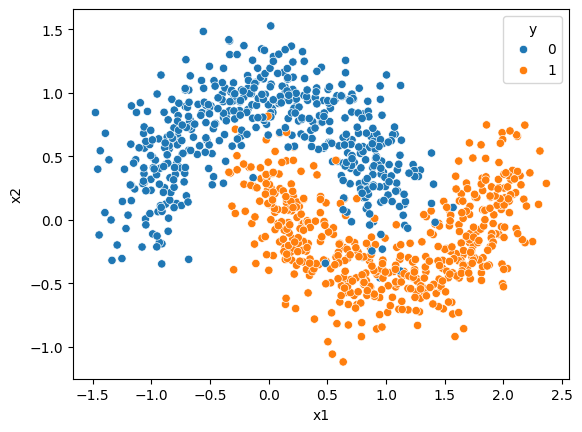

In [23]:
sns.scatterplot(x ="x1",y="x2",data=data,hue="y")
plt.show()

In [26]:
x_a = data.iloc[:,:-1]
y_a = data["y"]

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    0
997    0
998    0
999    0
Name: y, Length: 1000, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,train_size=0.2,random_state=42)

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [32]:
dt = DecisionTreeClassifier()

In [33]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
dt.score(x_test,y_test)*100,dt.score(x_train,y_train)*100

(92.5, 100.0)

In [38]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train),sv.score(x_test,y_test)

(0.96, 0.96875)

In [42]:
gb = GaussianNB()
gb.fit(x_train,y_train)
gb.score(x_train,y_train),gb.score(x_test,y_test)

(0.88, 0.86125)

In [ ]:
# now we see all thre three models sep now we essemble learing to do this better

# max_voting

In [44]:
from sklearn.ensemble import VotingClassifier

In [47]:
li = [("dt1",DecisionTreeClassifier()),("svm1",SVC()),("gb1",GaussianNB())] # as according to above paragraph

In [73]:
vc = VotingClassifier(li,weights=[7,15,5]) # weightwage in register and it is passed in list shift tab 
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('svm1', SVC()),
                             ('gb1', GaussianNB())],
                 weights=[7, 15, 5])

In [74]:
vc.score(x_train,y_train)*100,vc.score(x_test,y_test)*100

(96.0, 96.875)

In [79]:
prd1 = {"dt":dt.predict(x_test),"sv": sv.predict(x_test),"gb":gb.predict(x_test),"vc":vc.predict(x_test)}

In [81]:
prd2 = pd.DataFrame(prd1)

In [82]:
prd2.head(50)

,dt,sv,gb,vc
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,1,1,1
4,1,1,1,1
5,1,1,1,1
6,1,1,1,1
7,0,0,0,0
8,1,1,0,1
9,0,0,0,0


# VOTING REGRESSOR